<a href="https://colab.research.google.com/github/shimul1725/Brain-Tumor-Detection-with-Data-Science/blob/main/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

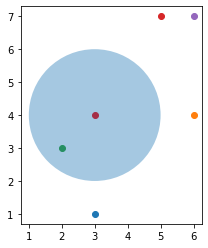

1.4142135623730951


In [ ]:
#This part is just for intuition, how does it work in the background
X = np.array([[1, 3],[4, 6],[3, 2],[7, 5],[7, 6]])
for i in range(len(X)):
    plt.scatter(X[i][1], X[i][0])

plt.scatter(3, 4, color='red')
circle = plt.Circle((3, 4), radius=2, alpha=0.4)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

euclidianDis = np.sqrt((3-2)**2 + (4-3)**2)
print(euclidianDis)

In [ ]:
class NaiveBayesClassifier(object):
    
    def __init__(self):
        pass
    
    #Input: X - features of a trainset
    #       y - labels of a trainset
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.no_of_classes = np.max(self.y_train) + 1
     
        
    #This is our function to calculate all nodes/samples in our radius    
    def euclidianDistance(self, Xtest, Xtrain):
        return np.sqrt(np.sum(np.power((Xtest - Xtrain), 2)))
    
       
    #our main function is predict
    #All calculation is done by using our test or new samples
    #There are 4 steps to be performed:
    # 1. calculate Prior probability. Ex. P(A) = No_of_elements_of_one_class / total_no_of_samples
    # 2. calculate Margin probability P(X) = No_of_elements_in_radius / total_no_of_samples
    # 3. calculate Likeliyhood (P(X|A) = No_of_elements_of_current_class / total_no_of_samples
    # 4. calculate Posterior probability: P(A|X) = (P(X|A) * P(A)) / P(X)
    # NOTE: Do these steps for all clases in dataset!
    #
    #Inputs: X - test dataset
    #       radius - this parameter is how big circle is going to be around our new datapoint, default = 2
    def predict(self, X, radius=0.4):   
        pred = []
        
        #Creating list of numbers of elements for each class in trainset
        members_of_class = []
        for i in range(self.no_of_classes):
            counter = 0
            for j in range(len(self.y_train)):
                if self.y_train[j] == i:
                    counter += 1
            members_of_class.append(counter)
        
        #Entering the process of prediction
        for t in range(len(X)):
            #Creating empty list for every class probability
            prob_of_classes = []
            #looping through each class in dataset
            for i in range(self.no_of_classes):
                
                #1. step > Prior probability P(class) = no_of_elements_of_that_class/total_no_of_elements
                prior_prob = members_of_class[i]/len(self.y_train)

                #2. step > Margin probability P(X) = no_of_elements_in_radius/total_no_of_elements
                #NOTE: In the same loop collecting infromation for 3. step as well
                
                inRadius_no = 0
                #counter for how many points are from the current class in circle
                inRadius_no_current_class = 0
                
                for j in range(len(self.X_train)):
                    if self.euclidianDistance(X[t], self.X_train[j]) < radius:
                        inRadius_no += 1
                        if self.y_train[j] == i:
                            inRadius_no_current_class += 1
                
                #Computing, margin probability
                margin_prob = inRadius_no/len(self.X_train)
                
                #3. step > Likelihood P(X|current_class) = no_of_elements_in_circle_of_current_class/total_no_of_elements
                likelihood = inRadius_no_current_class/len(self.X_train)
                
                #4. step > Posterial Probability > formula from Bayes theorem: P(current_class | X) = (likelihood*prior_prob)/margin_prob
                post_prob = (likelihood * prior_prob)/margin_prob
                prob_of_classes.append(post_prob)
            
            #Getting index of the biggest element (class with the biggest probability)
            pred.append(np.argmax(prob_of_classes))
                
        return pred
    

In [ ]:
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_tes))*100

In [ ]:
#Testing Breast Cancer dataset
def breastCancerTest():
    # Importing the dataset
    dataset = pd.read_csv('breastCancer.csv')
    dataset.replace('?', 0, inplace=True)
    dataset = dataset.applymap(np.int64)
    X = dataset.iloc[:, 1:-1].values    
    y = dataset.iloc[:, -1].values
    #This part is necessery beacuse of NUMBER of features part of algo
    #and in this dataset classes are marked with 2 and 4
    y_new = []
    for i in range(len(y)):
        if y[i] == 2:
            y_new.append(0)
        else:
            y_new.append(1)
    y_new = np.array(y_new)


    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    
    #Testing my Naive Bayes Classifier
    NB = NaiveBayesClassifier()
    NB.fit(X_train, y_train)
    
    y_pred = NB.predict(X_test, radius=8)
    
    #sklearn
    from sklearn.naive_bayes import GaussianNB
    NB_sk = GaussianNB()
    NB_sk.fit(X_train, y_train)
    
    sk_pred = NB_sk.predict(X_test)
     
    
    print("Accuracy for my Naive Bayes Classifier: ", accuracy(y_test, y_pred), "%")
    print("Accuracy for sklearn Naive Bayes Classifier: ",accuracy(y_test, sk_pred), "%")

In [ ]:
breastCancerTest()

Accuracy for my Naive Bayes Classifier:  96.57142857142857 %
Accuracy for sklearn Naive Bayes Classifier:  95.42857142857143 %


In [ ]:
dataset = pd.read_csv('breastCancer.csv')

In [ ]:
dataset.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000
